In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Batch gradient descent w/ Early stopping for softmax regression 

In [59]:
# load the dataset
#split it Train validation test 0.2 0.2 each
#y should be a 1 hot encoded vector
#gradient descent so scaling necessary for X
#softmax fn
#simple gradient descent
#accuracy
#regularization
#early stopping gradient descent acc

#finally, test set

In [60]:
from sklearn.datasets import load_iris #loader
data=load_iris()


In [61]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [62]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [63]:
print(data.data.shape)

(150, 4)


150 samples, 4 attributes. 3 classes ['setosa' 'versicolor' 'virginica']

In [64]:
#bias term allows the model to fit the data not centered around origin
np.random.seed(42)
X_bias = np.c_[np.ones(len(data.data)), data.data]
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_bias)

test_size = int(total_size * 0.2)
validation_size = int(total_size * 0.2)
train_size = total_size - test_size - validation_size


indices = np.random.permutation(total_size)

X_train = X_bias[indices[:train_size]]
y_train = data.target[indices[:train_size]]
X_valid = X_bias[indices[train_size:-test_size]]
y_valid = data.target[indices[train_size:-test_size]]
X_test = X_bias[indices[-test_size:]]
y_test = data.target[indices[-test_size:]]


In [65]:
#y should be a 1 hot encoded vector

def one_hot_encode(y):
    # 3 cols in y peratining to[0,1,2]-> ['setosa' 'versicolor' 'virginica']
    ohe=np.zeros((y.shape[0],3))
    n=y.shape[0]
    for i in range(n):
        a=int(y[i])
        ohe[i][a]=1
    return ohe
    
    
    
    

In [66]:
y_train_ohe=one_hot_encode(y_train)
y_valid_ohe=one_hot_encode(y_valid)
y_test_ohe=one_hot_encode(y_test)

In [67]:
#gradient descent so scaling necessary for X
#gotta scale X_train,X_scaled,X_test
#Note: you scale the data with the mean and std dev of the TRAINING DATA

In [68]:
#Scaling the data.
 #exclude the fist column as it consists of a bias term
mean = X_train[:, 1:].mean(axis=0) 
std_dev = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std_dev
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std_dev
X_test[:, 1:] = (X_test[:, 1:] - mean) / std_dev

In [69]:
#softmax fn
def softmax(logits):
    #logits->(n,k) 
    # compute the exp for each row(element) and then, normalize row-wise
    exps=np.exp(logits) #calculates for each element indpendently
    sum_exps=exps.sum(axis=1,keepdims=True) #row wise 
    return exps/sum_exps
    #keepdims ensures that the output arr has the same dimensions as the input arr
    

### simple gradient descent

##### plotting validation error at certain epochs during model training. This allows you to monitor the model's performance on unseen data and can provide valuable insights into its generalization ability and whether it's overfitting or underfitting.

In [70]:
#W is a d x k matrix, where d-> number of features, k->number of classes
n_inputs=X_train.shape[1] #d
n_classes=y_test_ohe.shape[1] #K



$$\nabla_w J(W)=-\frac{1}{n}\sum_{i=1}^n(\^p_k^i-y_k^i)x^i$$

In [71]:
np.random.seed(42)

eta=0.01
n_epochs=6001
n=len(X_train)

W=np.random.randn(n_inputs,n_classes)
#gd: score->apply softmax -> get y_pred_prbab ->error ->gradient using the error ->W update
for epoch in range(n_epochs):
    logits=X_train @ W # (n x d) (d x k) -> (n x k)
    y_probab=softmax(logits) #(n x k)

    if epoch%1000==0: #at each 1000th iteration
        y_valid_probab=softmax(X_valid @ W)
        entropy_loss= -(y_valid_ohe * np.log(y_valid_probab + 1e-5))
        print(epoch,entropy_loss.sum(axis=1).mean())
    residual=y_probab - y_train_ohe
    gradients= 1/n*X_train.T @ residual
    #divide by number of samples in gradient and mini batch, not in stochastic
    
    W=W - eta * gradients




0 4.626481998690278
1000 0.36574227068022774
2000 0.30155031828131335
3000 0.2675502728373675
4000 0.24430991163819288
5000 0.22713201157949256
6000 0.21385095122282038


In [72]:
W

array([[ 0.26583001,  1.82998556, -1.08967718],
       [-0.69959358,  0.74051622,  1.01381689],
       [ 2.17409602, -0.11708096, -0.1798419 ],
       [-2.0331503 ,  0.35797414,  1.28858876],
       [-2.32373606, -2.00587032,  0.93337058]])

In [73]:
logits = X_valid @ W
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

#### applying  l2 Ridge regularization


Cost function with l2 regularization
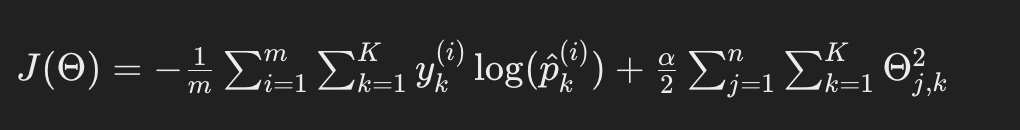

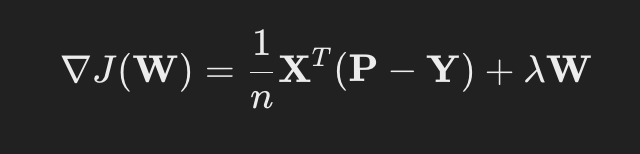

In [74]:
np.random.seed(42)
eta = 0.01
n_epochs = 5001
n = len(X_train)
epsilon = 1e-5
alpha = 0.01  # regularization hyperparameter


W = np.random.randn(n_inputs, n_classes)

for epoch in range(n_epochs):
    logits = X_train @ W
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ W)
        entropy_losses_reg = -(y_valid_ohe * np.log(Y_proba_valid + epsilon))
        #exclude the bias, l2 loss should be a scalar, sum it
        l2_loss = 1 / 2 * (W[1:] ** 2).sum()
        total_loss = entropy_losses_reg.sum(axis=1).mean() + alpha * l2_loss 
        print(epoch, total_loss.round(4))
    error = Y_proba - y_train_ohe
    gradients = 1 / n * X_train.T @ error
    #removing the bias term and adding it on the top again
    #this is done because, in the regularization caclulation alpha*W, we aim to exclude the bias term
    #at the end add it on the top againt to maintain consistency
    gradients += np.r_[np.zeros([1, n_classes]), alpha * W[1:]]
    W = W - eta * gradients

0 4.6922
1000 0.42
2000 0.3659
3000 0.3404
4000 0.3249
5000 0.3147


In [75]:
logits = X_valid @ W
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

#regularization doesnt faze the accuracy_score on the X_valid

In [77]:
logits = X_test @ W
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

#### 96% accuaracy at the very end